In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Specify the path to your Excel file
excel_file_path_1 = "/content/Steel_data1.xlsx"
excel_file_path_2 = "/content/Steel_data2.xlsx"
excel_file_path_3 = "/content/Steel_data3.xlsx"
excel_file_path_4 = "/content/Steel_data4.xlsx"
excel_file_path_5 = "/content/Steel_data5.xlsx"

# Read the Excel file into a DataFrame
df_1 = pd.read_excel(excel_file_path_1)
df_2 = pd.read_excel(excel_file_path_2)
df_3 = pd.read_excel(excel_file_path_3)
df_4 = pd.read_excel(excel_file_path_4)
df_5 = pd.read_excel(excel_file_path_5)

In [ ]:
# Drop a particular column (e.g., 'B')
column_to_drop = 'σy (MPa)'
df_1 = df_1.drop(column_to_drop, axis=1)
df_2 = df_2.drop(column_to_drop, axis=1)
df_3 = df_3.drop(column_to_drop, axis=1)

# Concatenate the DataFrames vertically
result_df = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
result_df = result_df.drop('Materials', axis=1)
result_df.reset_index(drop=True, inplace=True)

# Now, 'result_df' contains the merged DataFrame
print(result_df)

     E (GPa)  σu (MPa)  σf (MPa)  RA (%)     εf   HB  σL (MPa)
0        197     783.2    1207.0    55.1  0.800  180     260.0
1        196     905.5    1247.0    41.7  0.540  195     311.7
2        211     821.0    1128.0    49.6  0.700  238     254.5
3        202     828.5    1065.0    34.1  0.416  220     360.2
4        220    2360.0    2115.0    14.7  0.160  536     796.1
..       ...       ...       ...     ...    ...  ...       ...
166      205     565.0     931.0    64.0  1.030  159     205.1
167      205     565.0    1000.0    69.0  1.190  150     196.6
168      205     440.0     752.0    65.0  1.060  150     210.5
169      205     530.0    1000.0    72.0  1.240  156     235.5
170      195     695.0    1220.0    68.0  1.150  225     330.5

[171 rows x 7 columns]


In [ ]:
nan_count_per_column = result_df.isna().sum()
print(nan_count_per_column)

E (GPa)     0
σu (MPa)    0
σf (MPa)    5
RA (%)      5
εf          5
HB          0
σL (MPa)    0
dtype: int64


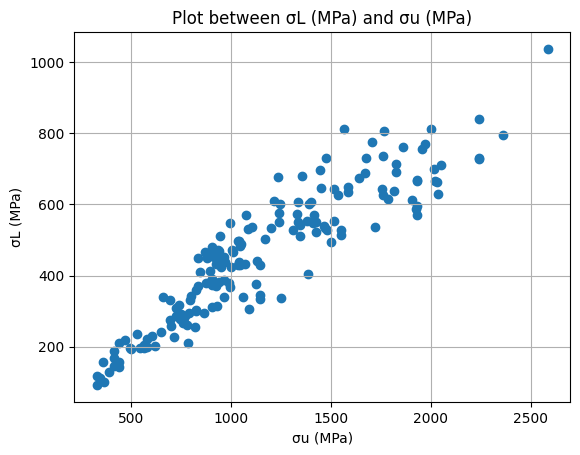

In [ ]:
# Extract the variables to plot
x = result_df['σu (MPa)']
y = result_df['σL (MPa)']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('σu (MPa)')
plt.ylabel('σL (MPa)')
plt.title('Plot between σL (MPa) and σu (MPa)')
plt.grid(True)
plt.show()

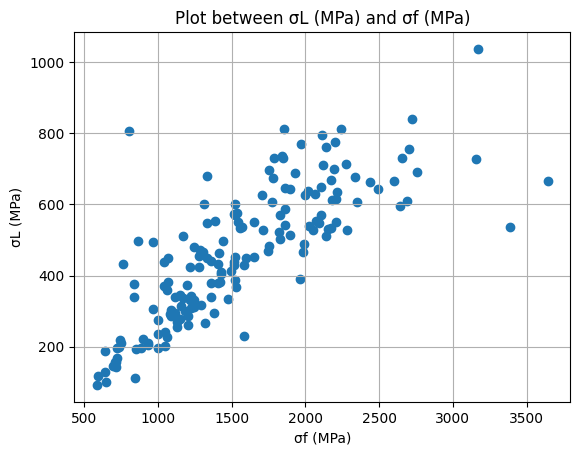

In [ ]:
# Extract the variables to plot
x = result_df['σf (MPa)']
y = result_df['σL (MPa)']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('σf (MPa)')
plt.ylabel('σL (MPa)')
plt.title('Plot between σL (MPa) and σf (MPa)')
plt.grid(True)
plt.show()

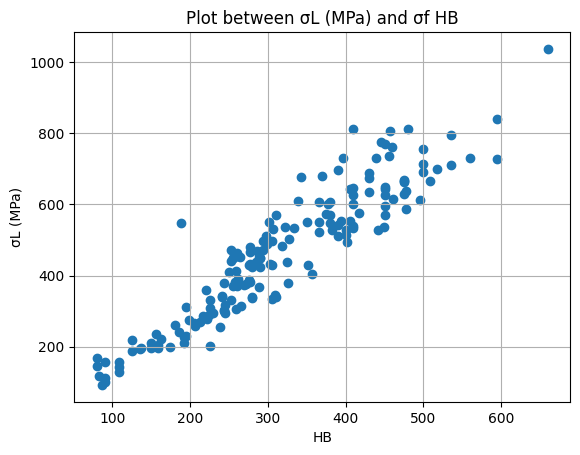

In [ ]:
# Extract the variables to plot
x = result_df['HB']
y = result_df['σL (MPa)']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('HB')
plt.ylabel('σL (MPa)')
plt.title('Plot between σL (MPa) and σf HB')
plt.grid(True)
plt.show()

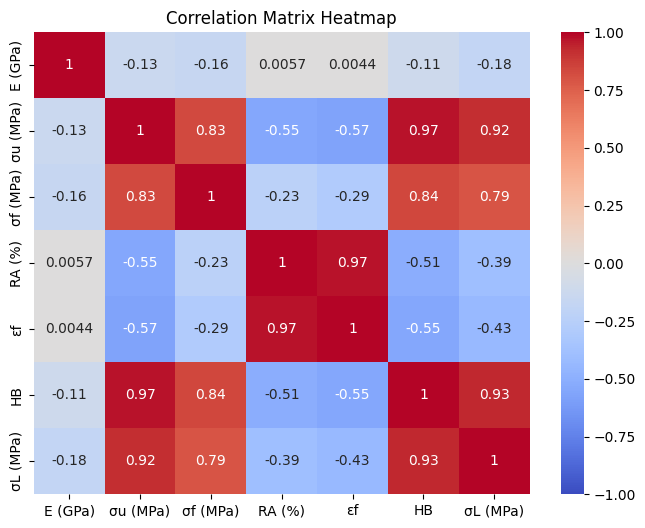

In [ ]:
#Finding the correlation matrix
correlation_matrix = result_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Since we see that fatigue limit is depending upon ulitmate tensile strength, fracture strength, and Brinell hardness(We will try to correlate brinell hardness separately).
#So we use two variables in our initial model
ml_df = result_df.drop(['E (GPa)', 'RA (%)', 'εf', 'HB'], axis=1)
ml_df




,σu (MPa),σf (MPa),σL (MPa)
0,783.2,1207.0,260.0
1,905.5,1247.0,311.7
2,821.0,1128.0,254.5
3,828.5,1065.0,360.2
4,2360.0,2115.0,796.1
...,...,...,...
166,565.0,931.0,205.1
167,565.0,1000.0,196.6
168,440.0,752.0,210.5
169,530.0,1000.0,235.5


In [ ]:
#Splitting the data for training-testing and prediction

# Define the number of rows you want for prediction
num_rows_for_prediction = 30  # Adjust this number as needed

# Randomly select rows for prediction
prediction_df = ml_df.sample(n=num_rows_for_prediction, random_state=42)  # Use a random seed (random_state) for reproducibility

# Remove the selected rows from the original DataFrame
ml_df = ml_df.drop(prediction_df.index)

#Resetting the column index
prediction_df.reset_index(drop=True, inplace=True)
ml_df.reset_index(drop=True, inplace=True)

In [ ]:
prediction_df

,σu (MPa),σf (MPa),σL (MPa)
0,847.0,1431.4,410.20
1,904.0,1245.4,480.50
2,1380.4,1384.5,554.81
3,1345.0,1862.0,541.70
4,2240.0,2654.0,729.90
5,883.0,1596.0,450.00
6,440.0,710.0,156.90
7,896.0,1499.0,412.60
8,1413.0,2091.2,547.90
9,1929.0,2642.7,597.00


In [ ]:
ml_df

,σu (MPa),σf (MPa),σL (MPa)
0,783.2,1207.0,260.0
1,905.5,1247.0,311.7
2,821.0,1128.0,254.5
3,828.5,1065.0,360.2
4,2360.0,2115.0,796.1
...,...,...,...
136,1565.0,1855.0,811.3
137,565.0,931.0,205.1
138,440.0,752.0,210.5
139,530.0,1000.0,235.5


In [ ]:
nan_count_per_column = ml_df.isna().sum()
print(nan_count_per_column)

σu (MPa)    0
σf (MPa)    4
σL (MPa)    0
dtype: int64


In [ ]:
ml_df = ml_df.dropna()

In [ ]:
# comparing various regressor models
!pip install pycaret
from pycaret.regression import *
reg = setup(data = ml_df, target = 'σL (MPa)')

,Description,Value
0,Session id,6199
1,Target,σL (MPa)
2,Target type,Regression
3,Original data shape,"(137, 3)"
4,Transformed data shape,"(137, 3)"
5,Transformed train set shape,"(95, 3)"
6,Transformed test set shape,"(42, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,60.3177,5515.1729,72.9696,0.8209,0.1754,0.1517,0.9350
lasso,Lasso Regression,60.3170,5514.9550,72.9681,0.8209,0.1754,0.1517,0.0790
ridge,Ridge Regression,60.3177,5515.1740,72.9696,0.8209,0.1754,0.1517,0.0950
en,Elastic Net,60.3174,5515.0632,72.9688,0.8209,0.1754,0.1517,0.0840
lar,Least Angle Regression,60.3177,5515.1738,72.9696,0.8209,0.1754,0.1517,0.0850
llar,Lasso Least Angle Regression,60.3174,5515.0674,72.9688,0.8209,0.1754,0.1517,0.0810
br,Bayesian Ridge,60.4001,5523.8872,73.0278,0.8207,0.1759,0.1522,0.0750
ada,AdaBoost Regressor,58.7849,6418.5232,75.2660,0.8127,0.1704,0.1456,0.3370
huber,Huber Regressor,61.7468,5881.6538,75.6275,0.8080,0.1706,0.1482,0.0510
rf,Random Forest Regressor,58.7581,6594.8042,76.4325,0.8000,0.1596,0.1318,0.3050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data_test_train= scaler.fit_transform(ml_df)
normalized_data_prediction = scaler.fit_transform(prediction_df)

In [ ]:
### Using Linear Regression

In [ ]:
# Specify the features (X) and the target variable (y)
X = ml_df.iloc[:, :-1]
y = ml_df.iloc[:, -1]

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train

,σu (MPa),σf (MPa)
60,905.0,1966.0
126,1760.0,1999.0
96,787.0,936.5
44,1502.0,968.2
15,908.6,1197.0
...,...,...
71,331.0,597.1
110,415.0,641.0
14,764.6,1131.0
95,496.0,724.2


In [ ]:
X_test

,σu (MPa),σf (MPa)
109,470.0,745.0
108,360.0,717.0
12,725.2,1087.0
26,964.0,837.0
127,2035.0,2068.0
66,1337.0,2351.0
64,1201.0,2172.0
119,890.0,1276.0
137,565.0,931.0
88,2033.0,2439.6


In [ ]:
y_train

60     391.8
126    626.5
96     211.9
44     494.8
15     374.3
       ...  
71     116.9
110    187.2
14     270.4
95     196.5
106    449.1
Name: σL (MPa), Length: 95, dtype: float64

In [ ]:
y_test

109     218.8
108     157.2
12      287.0
26      340.2
127     629.9
66      606.8
64      533.2
119     455.1
137     205.1
88      663.5
86      549.4
45      736.9
69       92.7
67      439.1
31      471.8
42      498.6
27      467.8
19      266.9
136     811.3
56      535.3
129     670.0
4       796.1
113     202.0
36      607.5
92      540.3
104    1037.2
16      194.3
18      278.5
10      432.0
134     371.2
51      575.2
11      341.8
118     423.3
76      291.1
102     811.3
121     523.3
105     449.1
0       260.0
78      728.5
62      676.6
40      730.4
24      710.2
Name: σL (MPa), dtype: float64

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# ml_df.reset_index(drop=True, inplace=True)

In [ ]:
nan_count_per_column = X_train.isna().sum()
print(nan_count_per_column)

σu (MPa)    0
σf (MPa)    0
dtype: int64


In [ ]:
# X_train = X_train.dropna()


model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))



0.8477520456402442


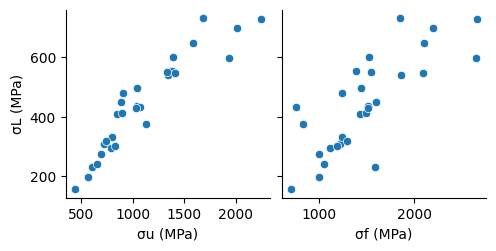

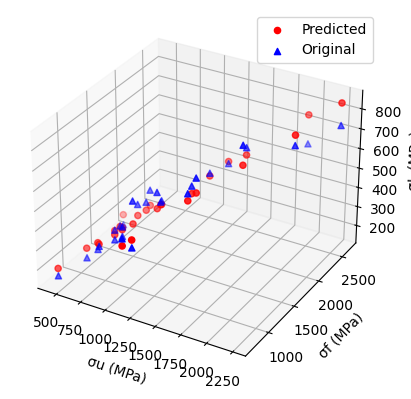

In [ ]:
prediction_df = prediction_df.dropna()

# Split the dataset into X (independent variables) and Y (dependent variable)
# σu (MPa)	σf (MPa)	HB	σL (MPa)
X_predict = prediction_df[['σu (MPa)', 'σf (MPa)']]
Y_predict = prediction_df['σL (MPa)']

# Assuming you've already trained a machine learning model (e.g., Linear Regression)
# and you've stored it in a variable named 'model', you can use it to predict Y values
Y_predicted = model.predict(X_predict)

# Method 1: Scatter Plot Matrix (Pair Plot)
import seaborn as sns
sns.pairplot(prediction_df, x_vars=['σu (MPa)', 'σf (MPa)'], y_vars=['σL (MPa)'], kind='scatter')
plt.show()

# Method 2: 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_predict['σu (MPa)'], X_predict['σf (MPa)'], Y_predicted, c='r', marker='o', label='Predicted')
ax.scatter(X_predict['σu (MPa)'], X_predict['σf (MPa)'], Y_predict, c='b', marker='^', label='Original')
ax.set_xlabel('σu (MPa)')
ax.set_ylabel('σf (MPa)')
ax.set_zlabel('σL (MPa)')
plt.legend()
plt.show()

#
